[0.750693142414093, 0.5638637542724609, 0.4452705383300781, 0.36153367161750793, 0.2982971668243408, 0.24849720299243927, 0.20810918509960175, 0.1747276484966278, 0.1467711478471756, 0.12331253290176392, 0.10356713086366653, 0.08691246807575226, 0.07290501147508621, 0.06112407147884369, 0.05123782157897949, 0.042955465614795685, 0.036041777580976486, 0.030287520959973335, 0.025509096682071686, 0.021560221910476685]


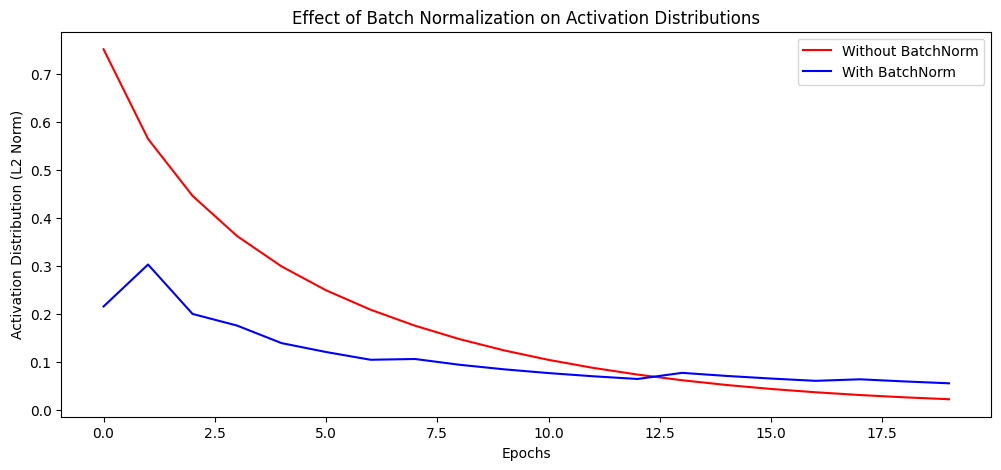

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
np.random.seed(0)
data = np.random.randn(1000, 1)
data = data.astype(np.float32)
data = torch.from_numpy(data)

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self, use_batch_norm=False):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 100)  # Linear layer
        if use_batch_norm:
            self.bn1 = nn.BatchNorm1d(100)  # Batch Normalization
        self.fc2 = nn.Linear(100, 1)  # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        if hasattr(self, 'bn1'):
            x = self.bn1(x)  # Apply BatchNorm if enabled
        x = self.fc2(x)
        return x

# Create two networks, one with Batch Normalization and one without
net_without_batch_norm = Net(use_batch_norm=False)
net_with_batch_norm = Net(use_batch_norm=True)

# Training loop
epochs = 20
loss_fn = nn.MSELoss()
optimizer_without_batch_norm = torch.optim.SGD(net_without_batch_norm.parameters(), lr=0.01)
optimizer_with_batch_norm = torch.optim.SGD(net_with_batch_norm.parameters(), lr=0.01)

activation_distributions_without_batch_norm = []
activation_distributions_with_batch_norm = []

for epoch in range(epochs):
    # Forward pass
    output_without_batch_norm = net_without_batch_norm(data)
    output_with_batch_norm = net_with_batch_norm(data)
    
    # Calculate loss
    loss_without_batch_norm = loss_fn(output_without_batch_norm, data)
    loss_with_batch_norm = loss_fn(output_with_batch_norm, data)
    
    # Backpropagation and optimization``
    optimizer_without_batch_norm.zero_grad()
    optimizer_with_batch_norm.zero_grad()
    loss_without_batch_norm.backward()
    loss_with_batch_norm.backward()
    optimizer_without_batch_norm.step()
    optimizer_with_batch_norm.step()
    
    # Record activation distributions
    activation_distributions_without_batch_norm.append(net_without_batch_norm.fc1.weight.grad.norm().item())
    activation_distributions_with_batch_norm.append(net_with_batch_norm.fc1.weight.grad.norm().item())

print(activation_distributions_without_batch_norm)

# Plot activation distributions
plt.figure(figsize=(12, 5))
plt.plot(activation_distributions_without_batch_norm, label='Without BatchNorm', color='red')
plt.plot(activation_distributions_with_batch_norm, label='With BatchNorm', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Activation Distribution (L2 Norm)')
plt.title('Effect of Batch Normalization on Activation Distributions')
plt.legend()
plt.show()


torch.Size([1000, 100])
torch.Size([1000, 100])
(1000, 1) (1000, 1)


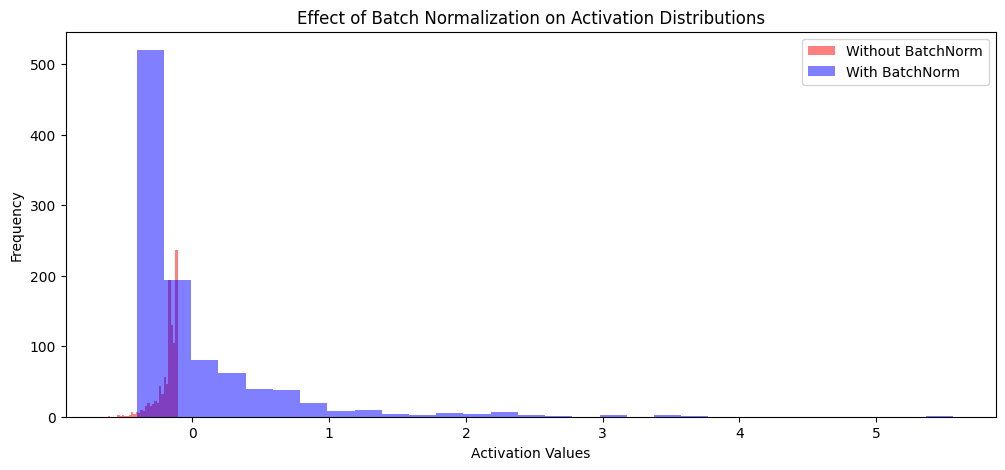

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
np.random.seed(42)
data = np.random.randn(1000, 1)
data = data.astype(np.float32)
data = torch.from_numpy(data)

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self, use_batch_norm=False):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 100)  # Linear layer
        if use_batch_norm:
            self.bn1 = nn.BatchNorm1d(100)  # Batch Normalization
        self.fc2 = nn.Linear(100, 1)  # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        if hasattr(self, 'bn1'):
            x = self.bn1(x)  # Apply BatchNorm if enabled
        print(x.shape)
        x = self.fc2(x)
        return x

# Create two networks, one with Batch Normalization and one without
net_without_batch_norm = Net(use_batch_norm=False)
net_with_batch_norm = Net(use_batch_norm=True)

# Forward pass for both networks
output_without_batch_norm = net_without_batch_norm(data).detach().numpy()
output_with_batch_norm = net_with_batch_norm(data).detach().numpy()

print(output_without_batch_norm.shape, output_with_batch_norm.shape)

# Plot activation distributions
plt.figure(figsize=(12, 5))
plt.hist(output_without_batch_norm, bins=30, alpha=0.5, label='Without BatchNorm', color='red')
plt.hist(output_with_batch_norm, bins=30, alpha=0.5, label='With BatchNorm', color='blue')
plt.xlabel('Activation Values')
plt.ylabel('Frequency')
plt.title('Effect of Batch Normalization on Activation Distributions')
plt.legend()
plt.show()


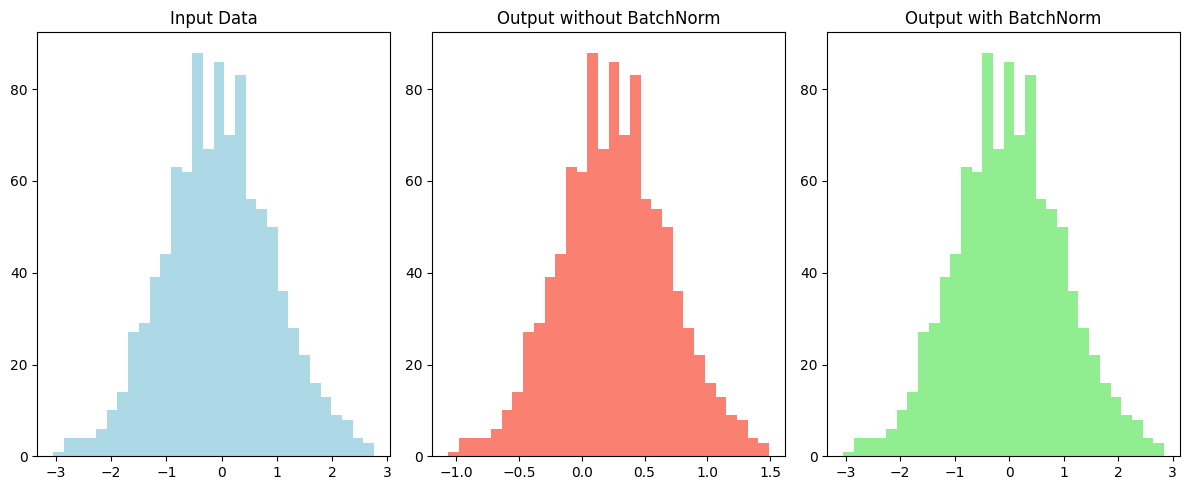

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
np.random.seed(0)
data = np.random.randn(1000, 1)
data = data.astype(np.float32)
data = torch.from_numpy(data)

# Define a neural network without Batch Normalization
class NetWithoutBN(nn.Module):
    def __init__(self):
        super(NetWithoutBN, self).__init__()
        self.fc1 = nn.Linear(1, 1)
    
    def forward(self, x):
        x = self.fc1(x)
        return x

# Define a neural network with Batch Normalization
class NetWithBN(nn.Module):
    def __init__(self):
        super(NetWithBN, self).__init__()
        self.fc1 = nn.Linear(1, 1)
        self.bn = nn.BatchNorm1d(1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn(x)
        return x

# Apply both networks to the input data
net_without_bn = NetWithoutBN()
net_with_bn = NetWithBN()

output_without_bn = net_without_bn(data)
output_with_bn = net_with_bn(data)

# Plot the original data, output without BatchNorm, and output with BatchNorm
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.hist(data.numpy(), bins=30, color='lightblue')
plt.title('Input Data')

plt.subplot(1, 3, 2)
plt.hist(output_without_bn.detach().numpy(), bins=30, color='salmon')
plt.title('Output without BatchNorm')

plt.subplot(1, 3, 3)
plt.hist(output_with_bn.detach().numpy(), bins=30, color='lightgreen')
plt.title('Output with BatchNorm')

plt.tight_layout()
plt.show()


In [4]:
import torch

bn = torch.nn.BatchNorm1d(10)
[p for p in bn.parameters()]

for i in range(100):
    output = bn(torch.randn(100, 10))
    output.sum().backward()
    with torch.no_grad():
        bn.weight -= 100 * bn.weight.grad
print(bn.weight)

Parameter containing:
tensor([1.0287, 1.0637, 1.0151, 1.0414, 1.0506, 0.9392, 1.0379, 0.8578, 0.9153,
        1.0059], requires_grad=True)


In [6]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8) # <1>
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out
    
device = (torch.device('cuda') if torch.cuda.is_available()
          else torch.device('cpu'))

In [13]:
model_a = Net()
model_b = model_a.to("cuda")
print(model_a is model_b)

tensor_a = torch.rand(1)
tensor_b = tensor_a.to("cuda")
print(tensor_a is tensor_b)

True
False


In [28]:
import torch
import torch.nn.functional as F

# Define the samples
s1 = torch.tensor([1.0, 3.0, 2.0, 5.0])
s2 = torch.tensor([2.0, 4.0, 7.0, 2.0])
s3 = torch.tensor([3.0, 3.0, 8.0, 9.0])

# Concatenate the samples into a single tensor
# The tensor should have the shape (N, C) where N is the number of samples and C is the number of features
concat = torch.stack([s1, s2, s3])

# Define the necessary parameters for batch normalization
num_features = concat.shape[1]  # Number of features
running_mean = torch.zeros(num_features)
running_var = torch.ones(num_features)

# Apply batch normalization
# Note: You need to set training=True to update running_mean and running_var during training
normalized_output = F.batch_norm(concat, running_mean, running_var, training=True)

# Compute the standard deviation from the running variance
std_dev = torch.sqrt(running_var)

print("Concatenated Tensor:")
print(concat)
print("Normalized Output:")
print(normalized_output)
print("Updated Running Mean:")
print(running_mean)
print("Updated Running Variance:")
print(running_var)
print("Standard Deviation:")
print(std_dev)

Concatenated Tensor:
tensor([[1., 3., 2., 5.],
        [2., 4., 7., 2.],
        [3., 3., 8., 9.]])
Normalized Output:
tensor([[-1.2247, -0.7071, -1.3970, -0.1162],
        [ 0.0000,  1.4142,  0.5080, -1.1625],
        [ 1.2247, -0.7071,  0.8890,  1.2787]])
Updated Running Mean:
tensor([0.2000, 0.3333, 0.5667, 0.5333])
Updated Running Variance:
tensor([1.0000, 0.9333, 1.9333, 2.1333])
Standard Deviation:
tensor([1.0000, 0.9661, 1.3904, 1.4606])
